In linux:

sudo R

sudo apt-get install python-virtualenv

sudo bash Anaconda3-2019.03-Linux-x86_64.sh

%then reopen the terminal

pip install louvain

pip install umap-learn

sudo apt-get install libudunits2-dev

sudo apt install libgdal-dev

sudo apt-get install mesa-common-dev

sudo apt-get install xorg 

sudo apt-get install libcgal-dev libglu1-mesa-dev libglu1-mesa-dev

sudo apt-get install libx11-dev 

sudo apt-get install libglu1-mesa-dev

conda install -c r r-rgl 

In R:

devtools::dev_mode(path='~/tools/Monocle3/')

source("http://bioconductor.org/biocLite.R")

biocLite()

biocLite("monocle")

install.packages("reticulate")

library(reticulate)

devtools::install_github("cole-trapnell-lab/DDRTree", ref="simple-ppt-like")

devtools::install_github("cole-trapnell-lab/L1-graph")

devtools::install_github("cole-trapnell-lab/monocle-release", ref="monocle3_alpha")

#py_install('umap-learn', pip = T, pip_ignore_installed = T) #It doesn't work

#py_install("louvain") #It doesn't work

In [1]:
devtools::dev_mode(path='~/tools/Seurat3/')

Dev mode: ON


In [2]:
library(Seurat)
library(dplyr)
library(monocle)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix
Loading required package: DelayedArray
Loading required package: stats4
Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following object is masked from ‘package:dplyr’:

    count

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The followin

In [3]:
sessionInfo()

R version 3.5.3 (2019-03-11)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] monocle_2.99.3          L1Graph_0.1.1           lpSolveAPI_5.5.2.0-17.1
 [4] DDRTree_0.1.5           irlba_2.3.3             igraph_1.2.4.1         
 [7] ggplot2_3.1.1           Biobase_2.42.0          DelayedArray_0.8.0     
[10] BiocParallel_1.16.6     IRanges_2.16.0          S4Vectors_0.20.1    

In [4]:
R.utils::sourceDirectory('~/tools/Rcodes/Monocle3-alpha-plus/',modifiedOnly=FALSE,verbose=TRUE)

In [5]:
DeepGenes <- read.table("190220DeepTree4000genes.txt",sep="_")
DeepGenes2=as.vector(unlist(DeepGenes[,2]))

In [6]:
load("190627MouseLimb10X_Monocle3.Robj")

In [7]:
MouseFull <- ReadH5AD(file = "../190714MouseLimb10Xraw.h5ad")

Pulling expression matrices and metadata
Data is unscaled
Creating assay object
Storing X as raw and raw as counts
No variable feature expression found in h5ad file
No dimensional reduction information found
Assembling Seurat object
No nearest-neighbor graph


In [8]:
pData(updated_MouseLimb10X_Monocle)$bh.pval.more.than.0.1 <- !MouseFull@meta.data$bh.pval.less.than.0.1

In [9]:
head(pData(updated_MouseLimb10X_Monocle))

nGene nUMI  orig.ident percent.mito res.0.6
limb12_13_0AAACCTGAGATCGATA_1 3404  11426 3          0.01636618   3      
limb12_13_0AAACCTGAGATGAGAG_1 2322   6474 2          0.01328390   0      
limb12_13_0AAACCTGAGCAGATCG_1 2162   8269 5          0.01160963   12     
limb12_13_0AAACCTGAGCGATCCC_1 3771  14966 6          0.01109181   11     
limb12_13_0AAACCTGAGTGTACCT_1 2517   7649 1          0.01804157   11     
limb12_13_0AAACCTGAGTTGTAGA_1 1871   4317 1          0.02200602   1      
                              res.0.7 res.1 res.0.9 res.0.8 res.0.5 res.0.3
limb12_13_0AAACCTGAGATCGATA_1 3       2     3       2       4       3      
limb12_13_0AAACCTGAGATGAGAG_1 1       10    1       0       3       2      
limb12_13_0AAACCTGAGCAGATCG_1 11      12    11      11      8       5      
limb12_13_0AAACCTGAGCGATCCC_1 10      11    10      10      9       6      
limb12_13_0AAACCTGAGTGTACCT_1 0       1     0       0       0       1      
limb12_13_0AAACCTGAGTTGTAGA_1 0       1     0       0       0       1      
                              res.1.5 res.0.1 batch  stage Size_Factor
limb12_13_0AAACCTGAGATCGATA_1 3       0       limb12 13.0  1.5223071  
limb12_13_0AAACCTGAGATGAGAG_1 6       0       limb12 13.0  0.8625430  
limb12_13_0AAACCTGAGCAGATCG_1 16      3       limb12 13.0  1.1016942  
limb12_13_0AAACCTGAGCGATCCC_1 10      0       limb12 13.0  1.9939479  
limb12_13_0AAACCTGAGTGTACCT_1 20      0       limb12 13.0  1.0190904  
limb12_13_0AAACCTGAGTTGTAGA_1 20      0       limb12 13.0  0.5751619  
                              Total_mRNAs num_genes_expressed louvain_component
limb12_13_0AAACCTGAGATCGATA_1 11426       3404                1                
limb12_13_0AAACCTGAGATGAGAG_1  6474       2322                1                
limb12_13_0AAACCTGAGCAGATCG_1  8269       2162                5                
limb12_13_0AAACCTGAGCGATCCC_1 14966       3771                1                
limb12_13_0AAACCTGAGTGTACCT_1  7649       2517                1                
limb12_13_0AAACCTGAGTTGTAGA_1  4317       1871                1                
                              bh.pval.more.than.0.1
limb12_13_0AAACCTGAGATCGATA_1 FALSE                
limb12_13_0AAACCTGAGATGAGAG_1  TRUE                
limb12_13_0AAACCTGAGCAGATCG_1  TRUE                
limb12_13_0AAACCTGAGCGATCCC_1  TRUE                
limb12_13_0AAACCTGAGTGTACCT_1  TRUE                
limb12_13_0AAACCTGAGTTGTAGA_1  TRUE

In [10]:
cell_type_color <- c('0'='#000000',
           '1'='#0118FA',
           '2'='#C0C0C0',
           '3'='#00FFFF',
           '4'='#FF8380',
           '5'='#8B8A1D',
           '6'='#CAC379',
           '7'='#00FF00',
           '8'='#FFFA2C',
           '9'='#C39CFB',
           '10'='#7762F0',
           '11'='#717E8D',
           '12'='#A71206',
           '13'='#35B5E2',
           '14'='#9834E7',
           '15'='#995432',
           '16'='#483F84',
           '17'='#ff0000',
           '18'='#216407',
           '19'='#ff42ef',
           '20'='#FBC83C',
           '21'='#FF9A21',
           '22'='#B4246E',
           '23'='#09658A',
           '24'='#016edb')

In [11]:
DelayedArray:::set_verbose_block_processing(TRUE)

[1] FALSE

In [25]:
updated_MouseLimb10X_Monocle <- updated_MouseLimb10X_Monocle[,
                        pData(updated_MouseLimb10X_Monocle)$bh.pval.more.than.0.1]

In [26]:
options(DelayedArray.block.size=1000e6)

In [27]:
updated_MouseLimb10X_Monocle <- estimateSizeFactors(updated_MouseLimb10X_Monocle)
updated_MouseLimb10X_Monocle <- estimateDispersions(updated_MouseLimb10X_Monocle)

Processing block 1/122 ... OK
Processing block 2/122 ... OK
Processing block 3/122 ... OK
Processing block 4/122 ... OK
Processing block 5/122 ... OK
Processing block 6/122 ... OK
Processing block 7/122 ... OK
Processing block 8/122 ... OK
Processing block 9/122 ... OK
Processing block 10/122 ... OK
Processing block 11/122 ... OK
Processing block 12/122 ... OK
Processing block 13/122 ... OK
Processing block 14/122 ... OK
Processing block 15/122 ... OK
Processing block 16/122 ... OK
Processing block 17/122 ... OK
Processing block 18/122 ... OK
Processing block 19/122 ... OK
Processing block 20/122 ... OK
Processing block 21/122 ... OK
Processing block 22/122 ... OK
Processing block 23/122 ... OK
Processing block 24/122 ... OK
Processing block 25/122 ... OK
Processing block 26/122 ... OK
Processing block 27/122 ... OK
Processing block 28/122 ... OK
Processing block 29/122 ... OK
Processing block 30/122 ... OK
Processing block 31/122 ... OK
Processing block 32/122 ... OK
Processing block 

In [28]:
options(future.globals.maxSize= 8096 * 1024^2)
library(future)
plan(strategy = "multicore", workers = 30)


Attaching package: ‘future’

The following objects are masked from ‘package:igraph’:

    %->%, %<-%

The following object is masked from ‘package:IRanges’:

    values

The following object is masked from ‘package:S4Vectors’:

    values



Processing block 1/6 ... OK
Processing block 2/6 ... OK
Processing block 3/6 ... OK
Processing block 4/6 ... OK
Processing block 5/6 ... OK
Processing block 6/6 ... OK


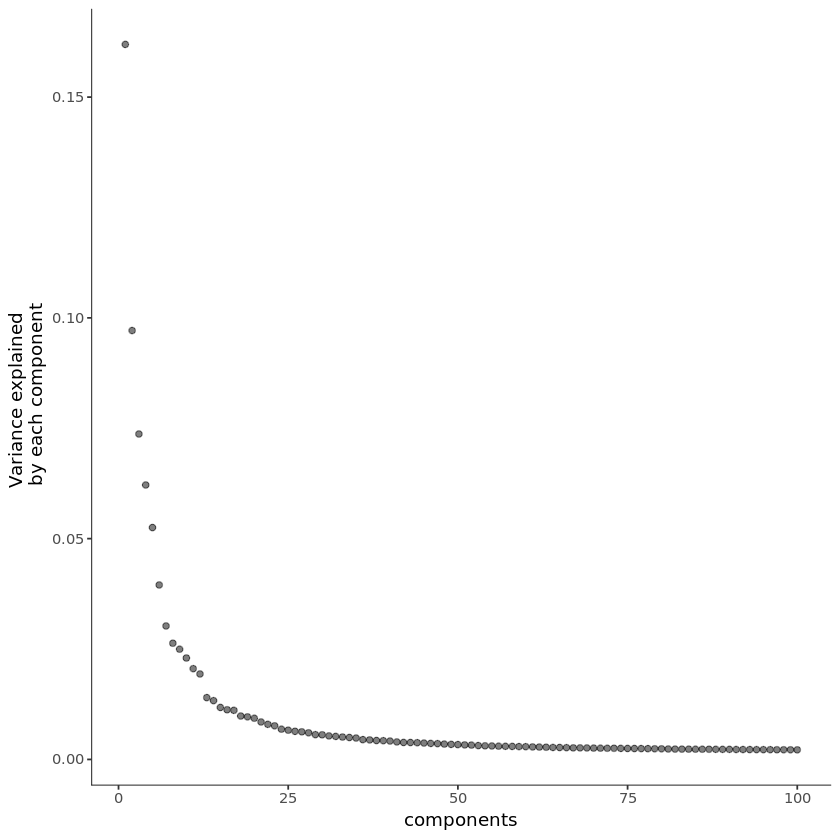

In [16]:
plot_pc_variance_explained(updated_MouseLimb10X_Monocle)

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/6 ... OK
Processing block 2/6 ... OK
Processing block 3/6 ... OK
Processing block 4/6 ... OK
Processing block 5/6 ... OK
Processing block 6/6 ... OK
Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.

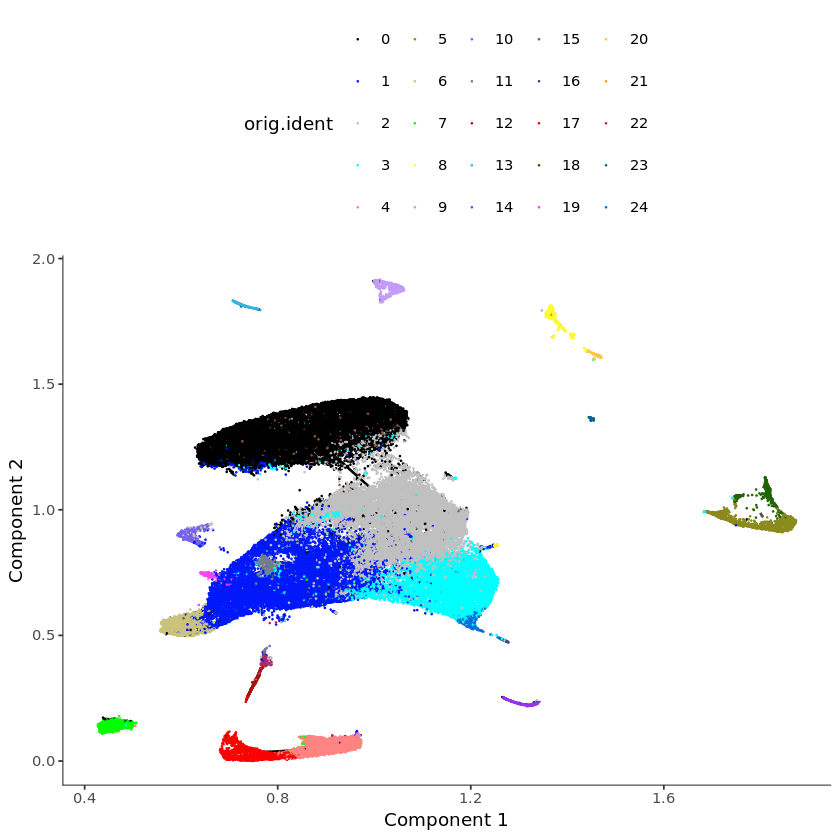

In [17]:
updated_MouseLimb10X_Monocle <- preprocessCDS(updated_MouseLimb10X_Monocle, num_dim = 50)
updated_MouseLimb10X_Monocle <- reduceDimension(updated_MouseLimb10X_Monocle, reduction_method = 'UMAP')
updated_MouseLimb10X_Monocle <- partitionCells(updated_MouseLimb10X_Monocle)
updated_MouseLimb10X_Monocle <- learnGraph(updated_MouseLimb10X_Monocle,  RGE_method = 'SimplePPT')
plot_cell_trajectory(updated_MouseLimb10X_Monocle,cell_size=0.1,
                     color_by = "orig.ident") +
                     scale_color_manual(values = cell_type_color)

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/6 ... OK
Processing block 2/6 ... OK
Processing block 3/6 ... OK
Processing block 4/6 ... OK
Processing block 5/6 ... OK
Processing block 6/6 ... OK
Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

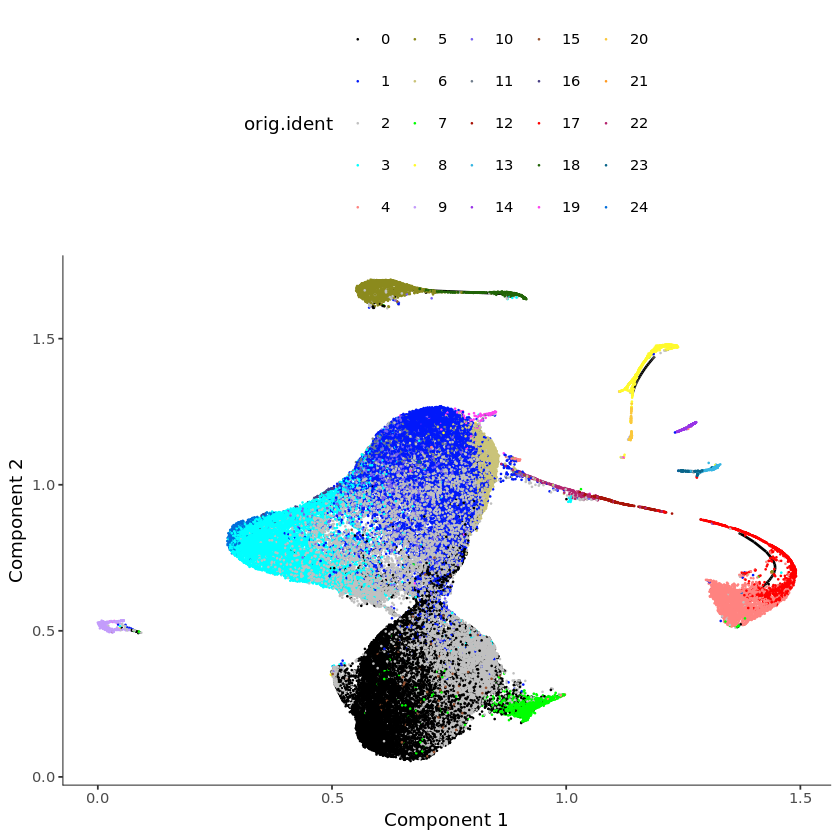

In [18]:
updated_MouseLimb10X_Monocle <- preprocessCDS(updated_MouseLimb10X_Monocle, num_dim = 12)
updated_MouseLimb10X_Monocle <- reduceDimension(updated_MouseLimb10X_Monocle, reduction_method = 'UMAP')
updated_MouseLimb10X_Monocle <- partitionCells(updated_MouseLimb10X_Monocle)
updated_MouseLimb10X_Monocle <- learnGraph(updated_MouseLimb10X_Monocle,  RGE_method = 'SimplePPT')
plot_cell_trajectory(updated_MouseLimb10X_Monocle,cell_size=0.1,
                     color_by = "orig.ident") +
                     scale_color_manual(values = cell_type_color)

In [29]:
pData(updated_MouseLimb10X_Monocle)$bh.pval <- MouseFull@meta.data[row.names(pData(updated_MouseLimb10X_Monocle)),
                                                                   'bh.pval']

In [30]:
pData(updated_MouseLimb10X_Monocle)$doublet.scores <- MouseFull@meta.data[row.names(pData(updated_MouseLimb10X_Monocle)),
                                                                   'doublet.scores']

## Muscle cells

In [44]:
cds = ClusterSubsetPCA_3alpha(updated_MouseLimb10X_Monocle,idents=c("4","7","12","17","22"),genes = DeepGenes2)

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK


Processing block 1/1 ... OK


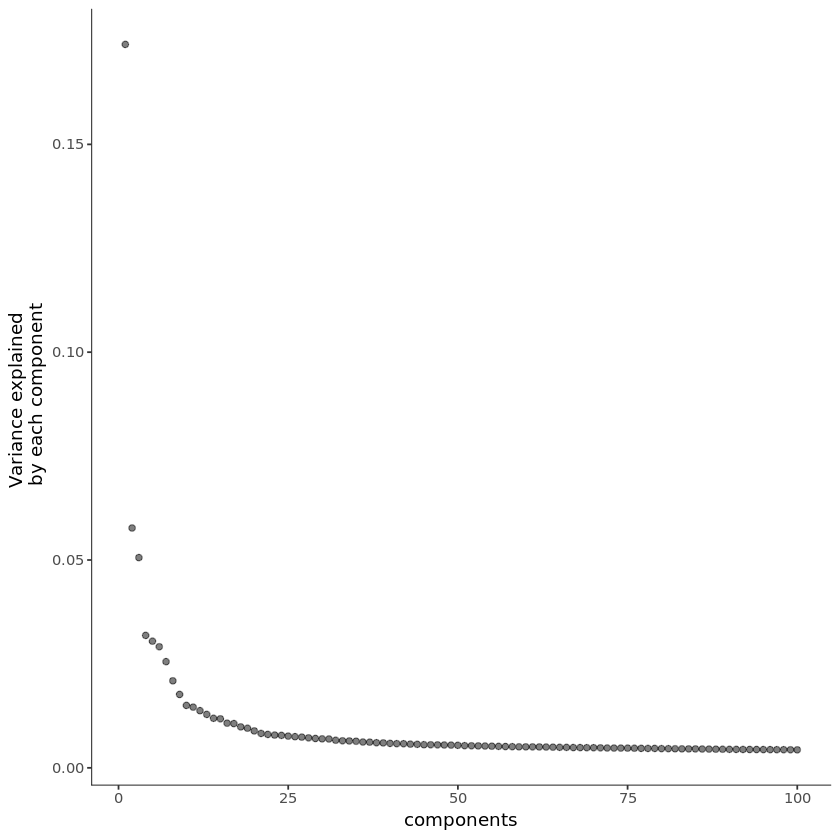

In [22]:
plot_pc_variance_explained(cds)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


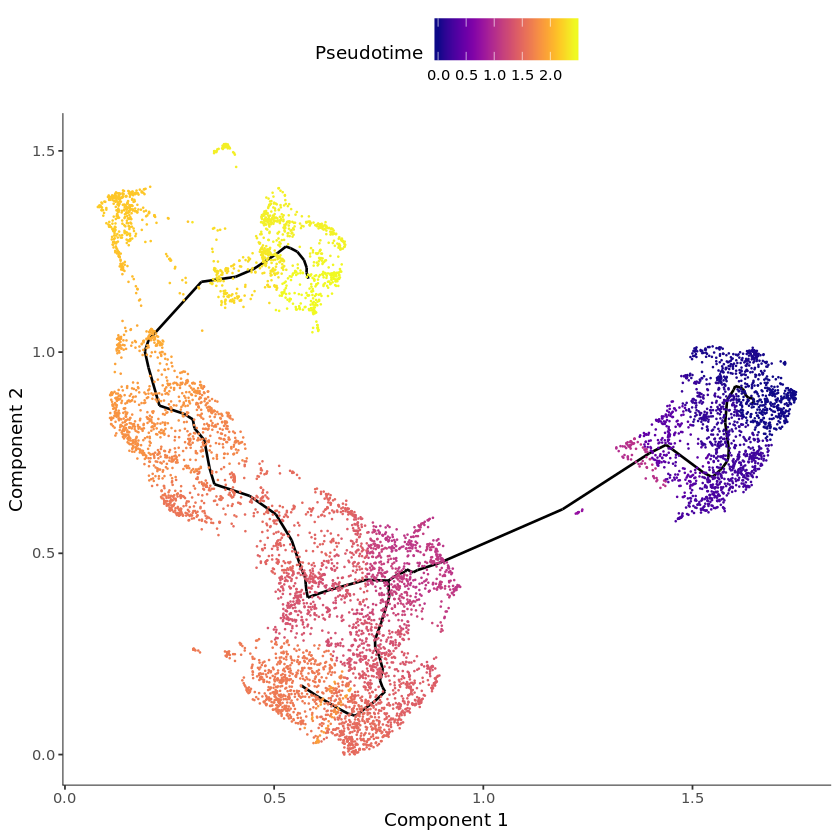

In [24]:
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "Pseudotime") + viridis::scale_color_viridis(option="plasma")

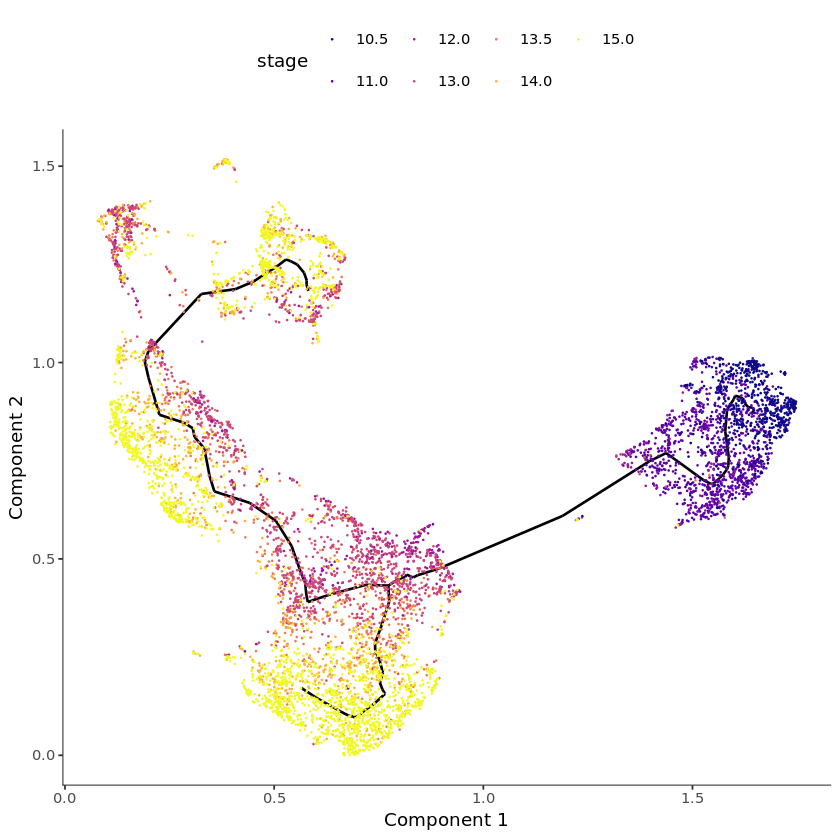

In [25]:
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "stage") + viridis::scale_color_viridis(option="plasma",discrete=TRUE)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


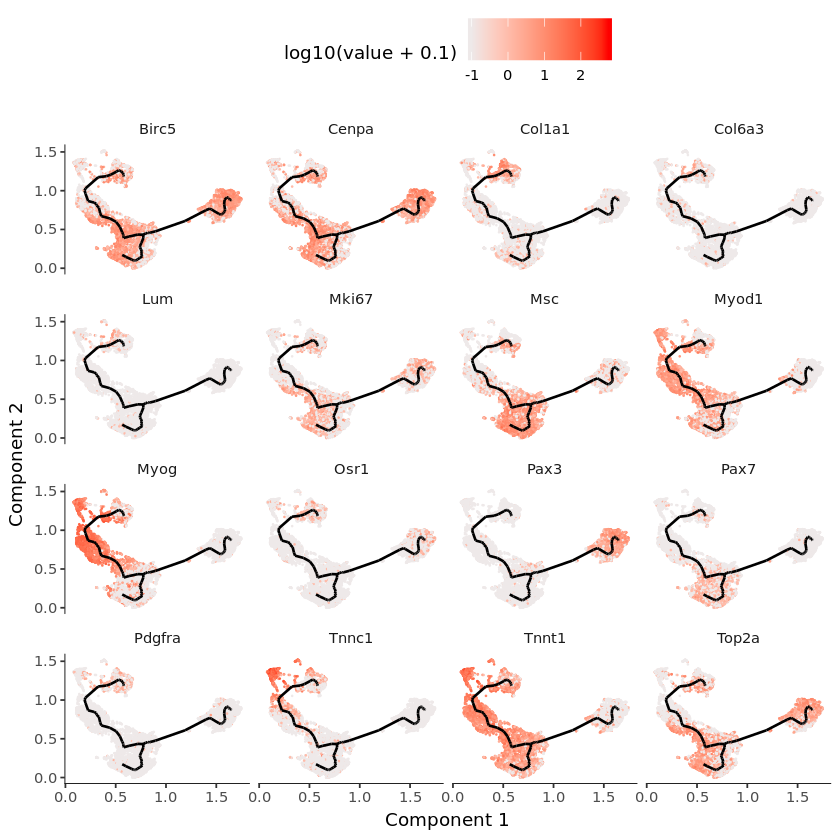

In [26]:
plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Osr1","Lum","Pdgfra","Myod1","Myog","Pax3","Pax7","Msc","Col6a3","Col1a1",
                       "Tnnt1","Tnnc1","Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2") 


In [27]:
cell_ids = 'limb7_10_5AAATGCCAGCGAGAAA_1'

In [28]:
WhichCells(object = MouseFull, expression = Pax3 > 20)

[1] "limb7_10_5AAATGCCAGCGAGAAA_1" "limb7_10_5ACATGGTTCCGCTGTT_1"
[3] "limb7_10_5CCGTTCACATTACGAC_1" "limb7_10_5CTCGGGATCCTCATTA_1"
[5] "limb7_10_5TCGCGAGTCCGCGCAA_1"

In [45]:
options(DelayedArray.block.size=1000e6)
cds <- preprocessCDS(cds,num_dim = 9)
cds <- UMAPLearnGraphFixPartition_3alpha(cds)
stage = 10.5
cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)
Plot1 <- plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "orig.ident") +
                     scale_color_manual(values = cell_type_color)
Plot2 <- plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "Pseudotime") + viridis::scale_color_viridis(option="plasma")
Plot3 <- plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "stage") + viridis::scale_color_viridis(option="plasma",discrete=TRUE)
Plot4 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Osr1","Lum","Pdgfra","Myod1","Myog","Pax3","Pax7","Msc","Col6a3","Col1a1",
                       "Tnnt1","Tnnc1","Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2") 
Plot5 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2")

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [46]:
pdf("Figures/190717_10X_Monocle3_removal_190813NewServer_dim9.pdf")

print(Plot1)
print(Plot2)
print(Plot3)
print(Plot4)
print(Plot5)

dev.off()


png 
  2

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

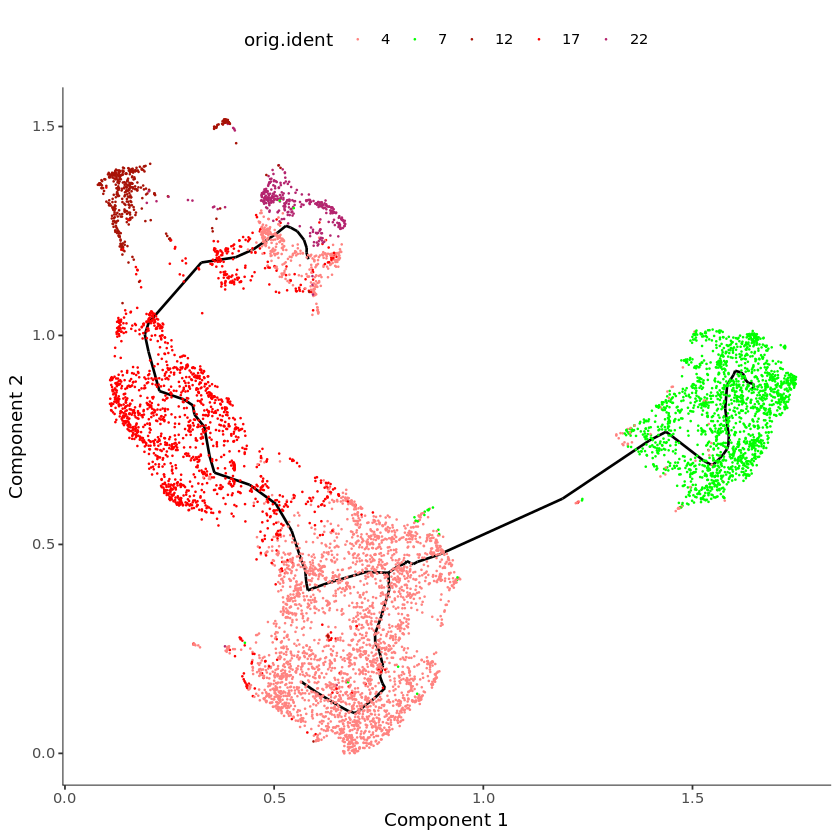

In [23]:
options(DelayedArray.block.size=1000e6)
cds <- preprocessCDS(cds,num_dim = 20)
cds <- UMAPLearnGraphFixPartition_3alpha(cds)
stage = 10.5
cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "orig.ident") +
                     scale_color_manual(values = cell_type_color)

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


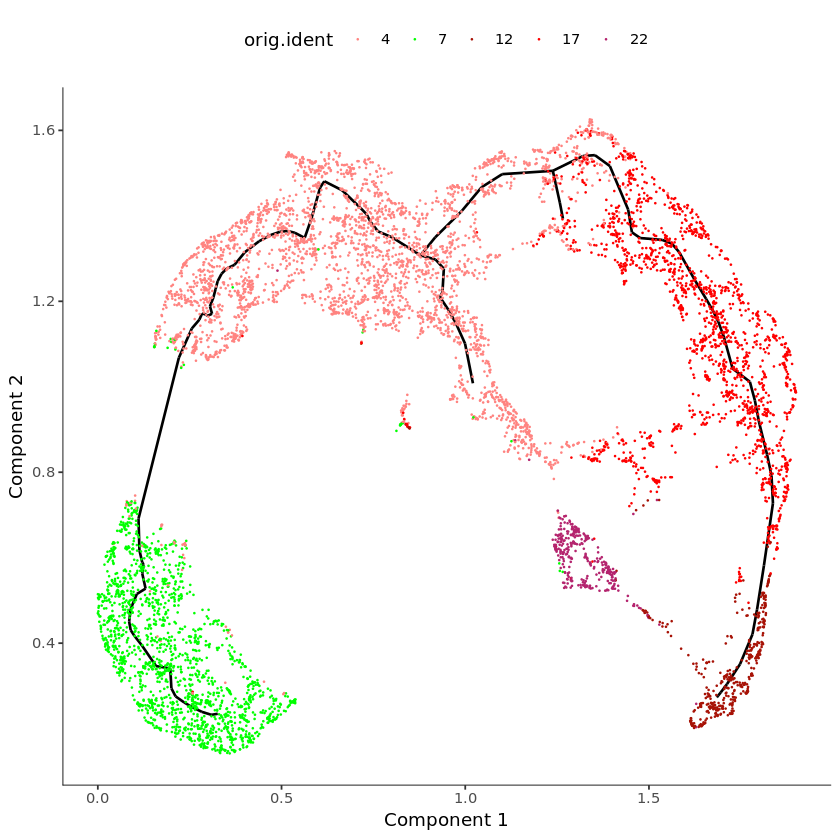

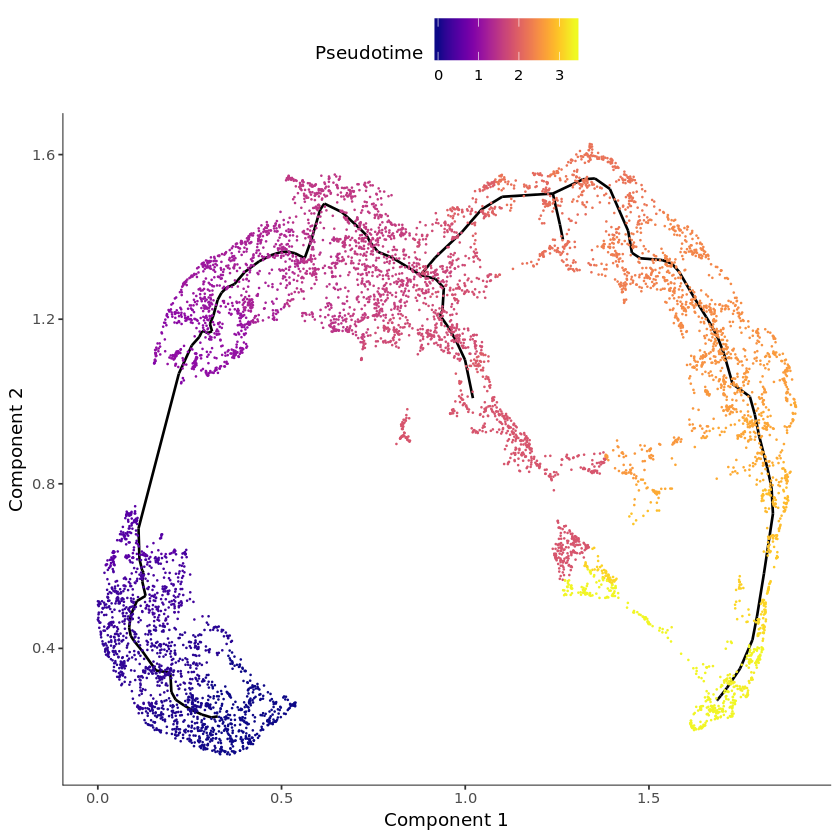

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


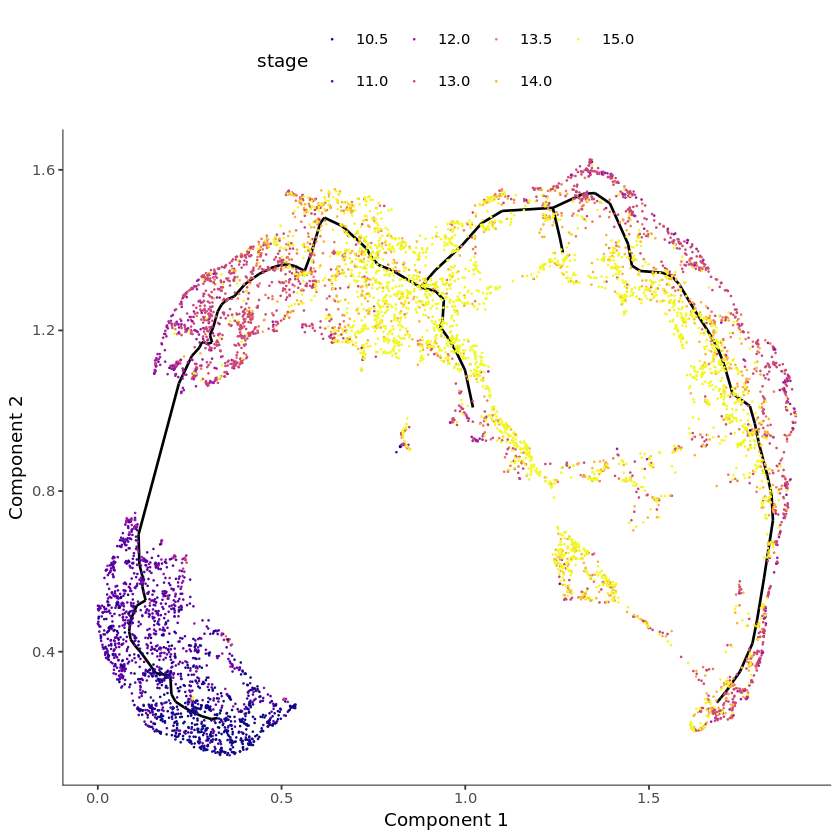

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


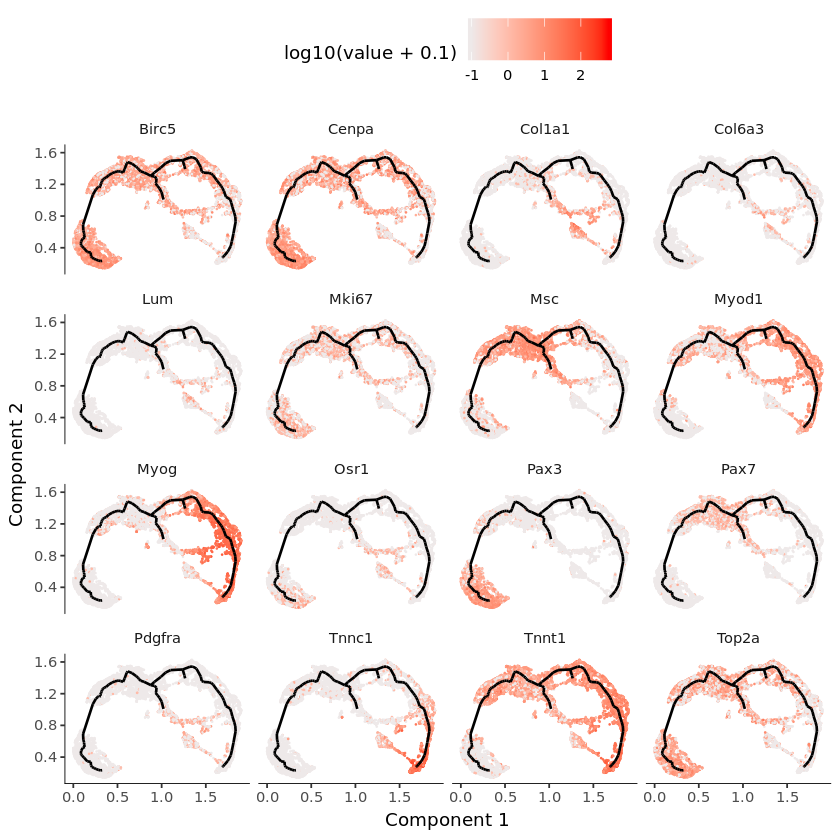

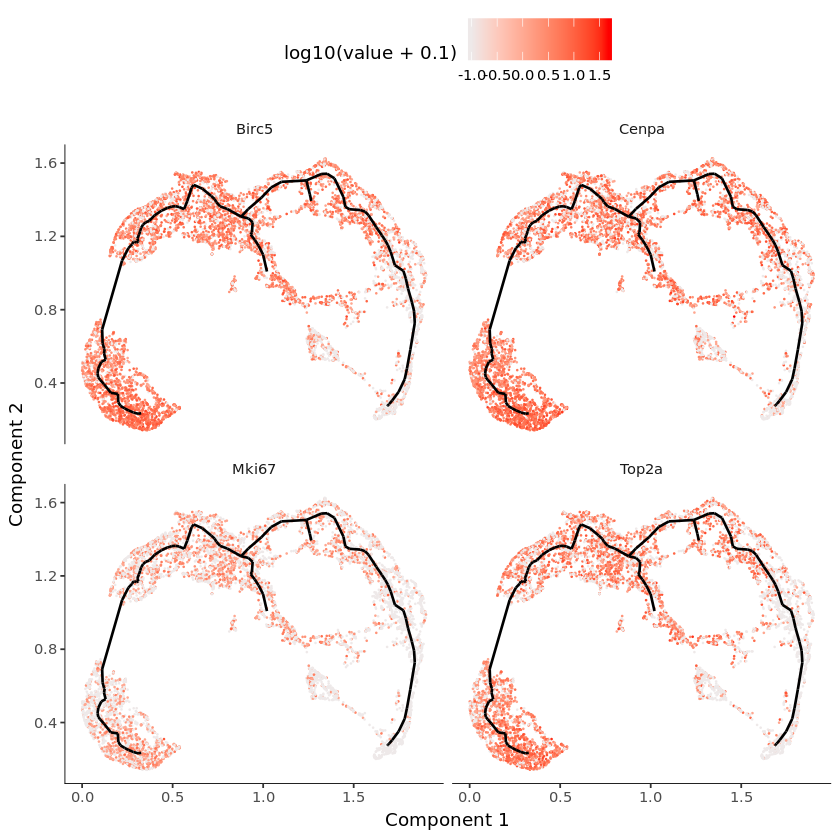

In [30]:
options(DelayedArray.block.size=1000e6)
cds <- preprocessCDS(cds,num_dim = 7)
cds <- UMAPLearnGraphFixPartition_3alpha(cds)
stage = 10.5
cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "orig.ident") +
                     scale_color_manual(values = cell_type_color)
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "Pseudotime") + viridis::scale_color_viridis(option="plasma")
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "stage") + viridis::scale_color_viridis(option="plasma",discrete=TRUE)
plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Osr1","Lum","Pdgfra","Myod1","Myog","Pax3","Pax7","Msc","Col6a3","Col1a1",
                       "Tnnt1","Tnnc1","Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2") 
plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2")

## Clean muscle

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Processing block 1/1 ... OK


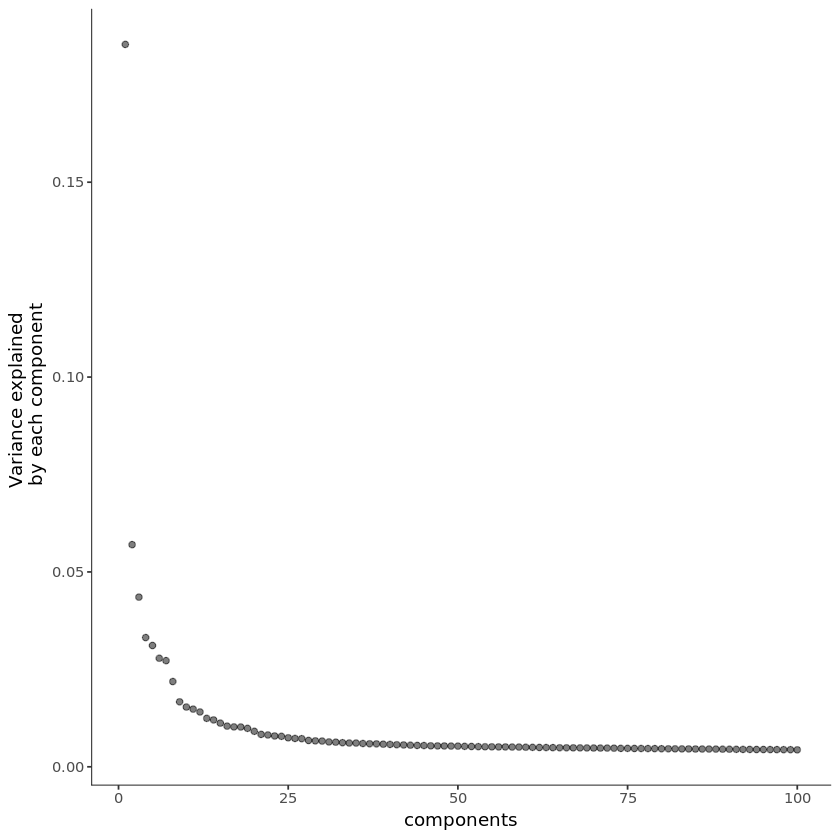

In [39]:
cds = ClusterSubsetPCA_3alpha(updated_MouseLimb10X_Monocle,idents=c("4","7","12","17"),genes = DeepGenes2)
plot_pc_variance_explained(cds)

In [41]:
options(DelayedArray.block.size=1000e6)
cds <- preprocessCDS(cds,num_dim = 8)
cds <- UMAPLearnGraphFixPartition_3alpha(cds)
stage = 10.5
cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)
Plot1 <- plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "orig.ident") +
                     scale_color_manual(values = cell_type_color)
Plot2 <- plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "Pseudotime") + viridis::scale_color_viridis(option="plasma")
Plot3 <- plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "stage") + viridis::scale_color_viridis(option="plasma",discrete=TRUE)
Plot4 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Osr1","Lum","Pdgfra","Myod1","Myog","Pax3","Pax7","Msc","Col6a3","Col1a1",
                       "Tnnt1","Tnnc1","Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2") 
Plot5 <- plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2")

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [43]:
pdf("Figures/190717_10X_Monocle3_removal_190813NewServer_clean_dim8.pdf")
print(Plot1)
print(Plot2)
print(Plot3)
print(Plot4)
print(Plot5)

dev.off()

png 
  2

Warning message in if (method == "PCA") {:
“the condition has length > 1 and only the first element will be used”Processing block 1/1 ... OK
Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


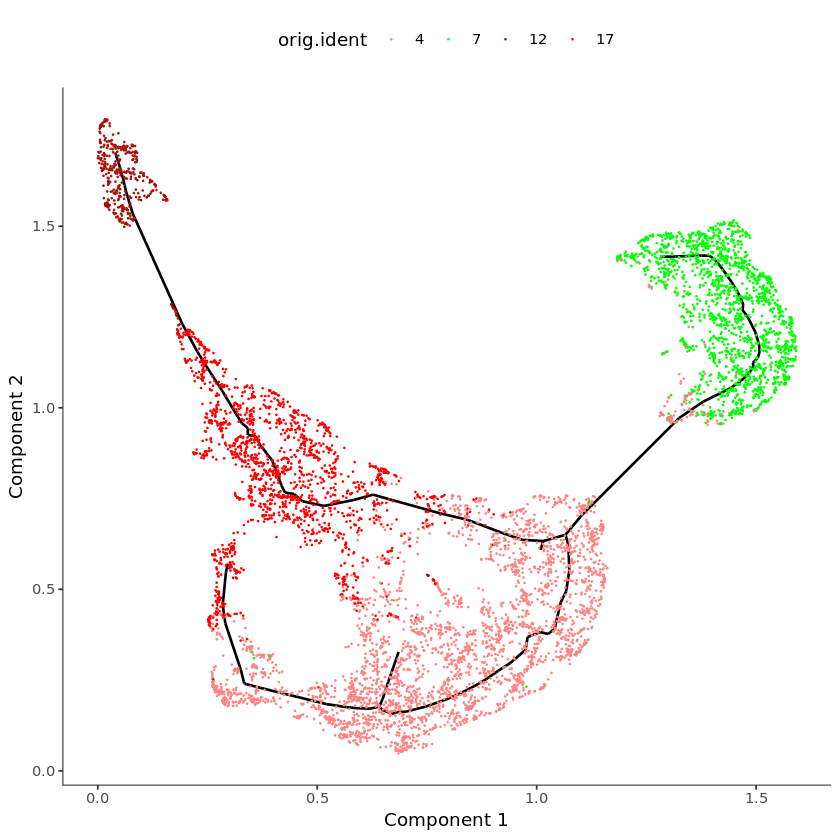

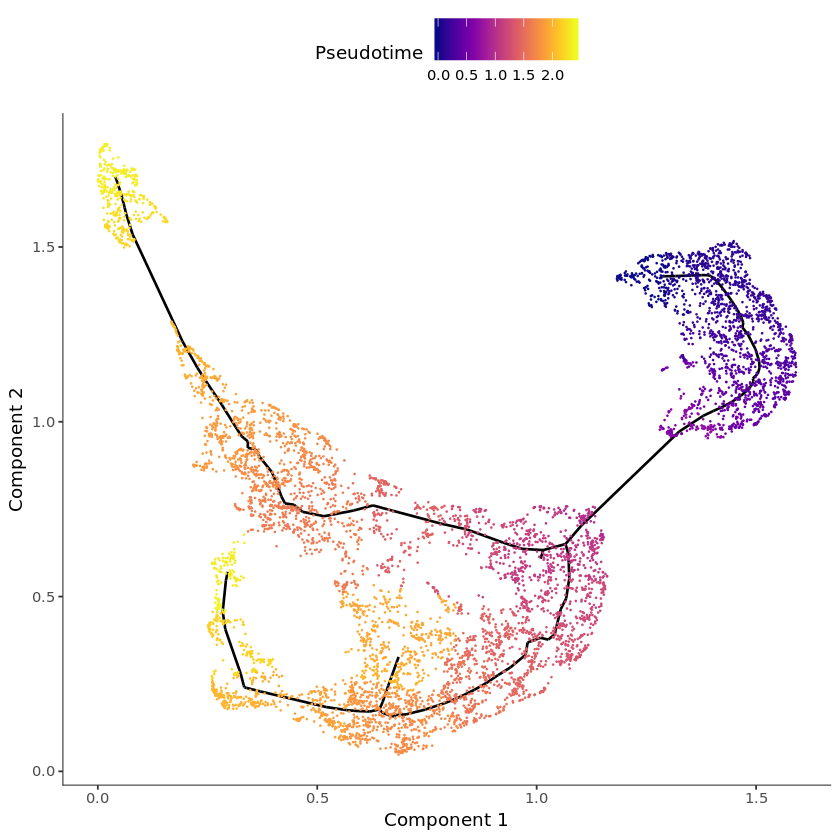

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


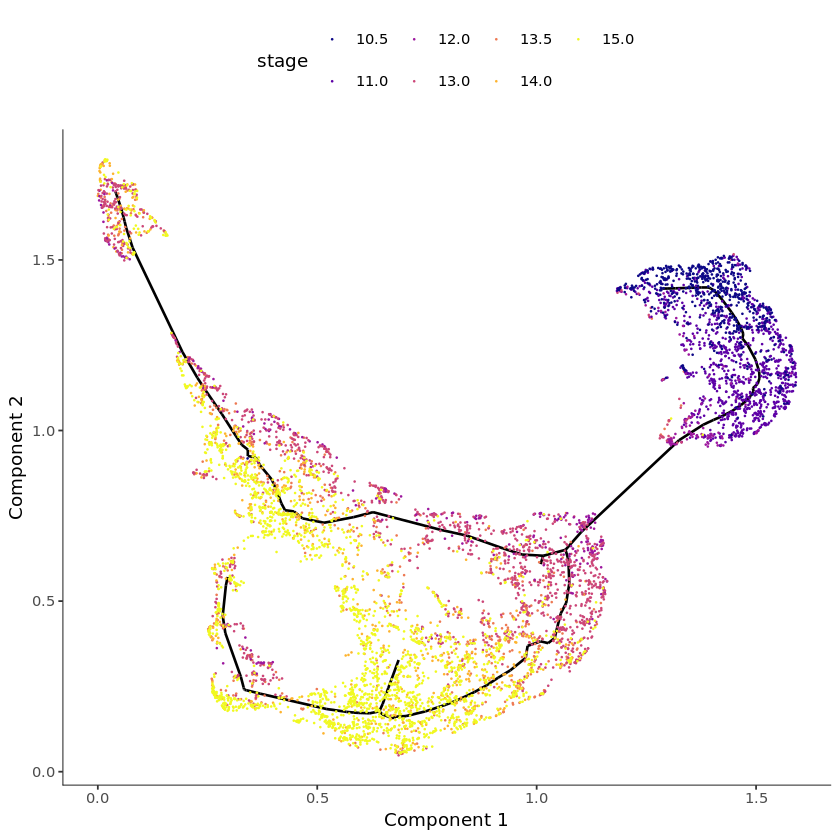

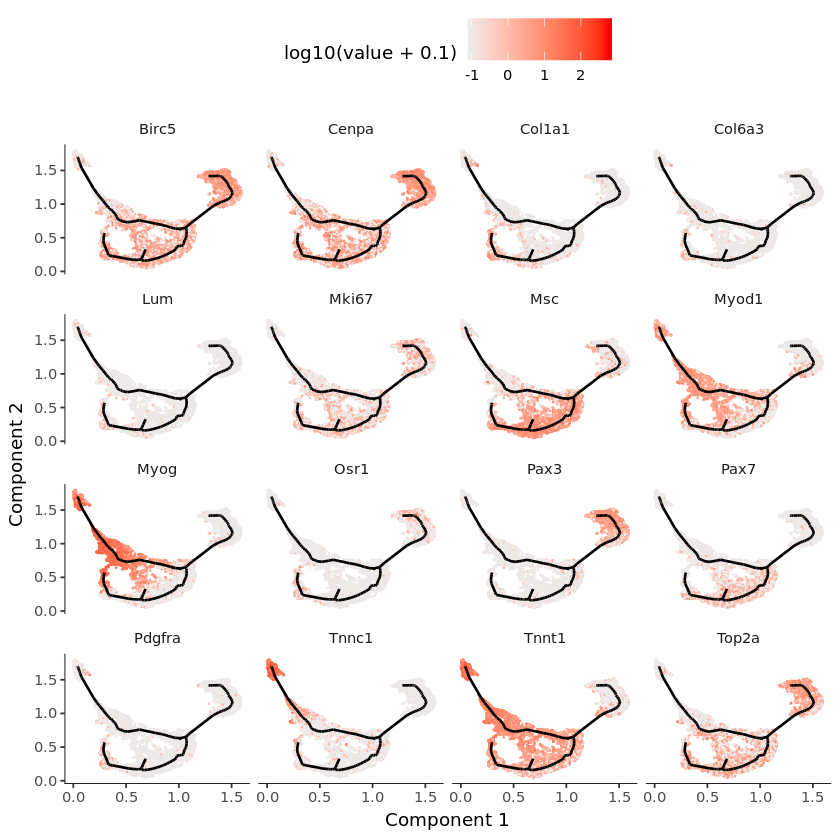

In [34]:
options(DelayedArray.block.size=1000e6)
cds <- preprocessCDS(cds,num_dim = 7)
cds <- UMAPLearnGraphFixPartition_3alpha(cds)
stage = 10.5
cell_ids <- which(pData(cds)[, "stage"] == stage)
root_pr_nodes <- Cells2Nodes_3alpha(cds,cell_ids)
cds = orderCells(cds, root_pr_nodes = root_pr_nodes)
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "orig.ident") +
                     scale_color_manual(values = cell_type_color)
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "Pseudotime") + viridis::scale_color_viridis(option="plasma")
plot_cell_trajectory(cds,cell_size=0.1,
                     color_by = "stage") + viridis::scale_color_viridis(option="plasma",discrete=TRUE)
plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Osr1","Lum","Pdgfra","Myod1","Myog","Pax3","Pax7","Msc","Col6a3","Col1a1",
                       "Tnnt1","Tnnc1","Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2") 

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


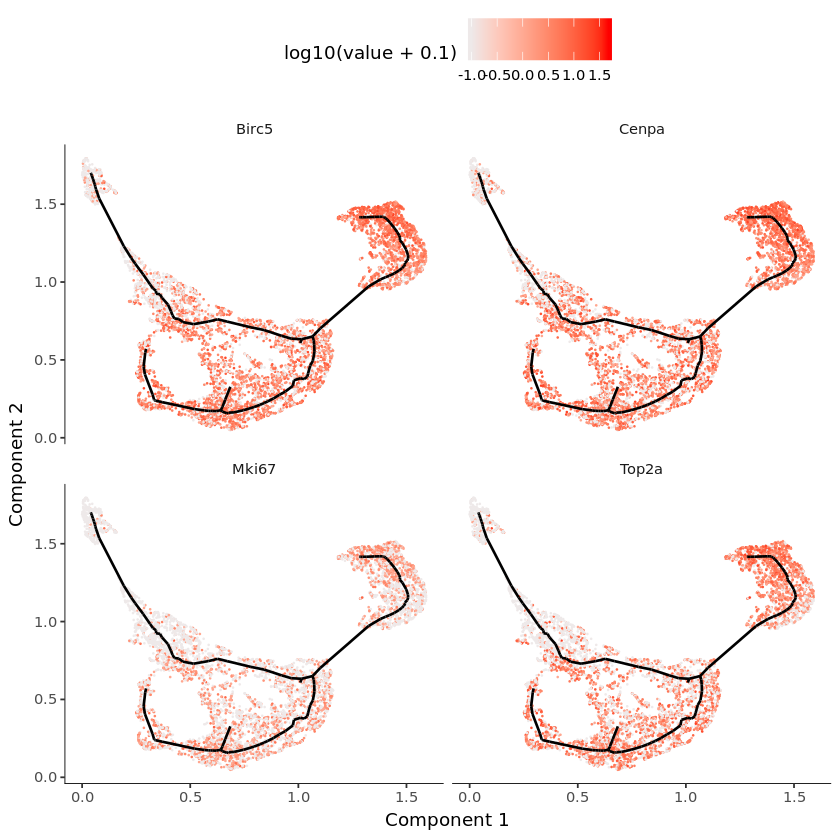

In [35]:
plot_cell_trajectory(cds,use_color_gradient = TRUE,cell_size=0.1,
                     markers=c("Birc5", "Cenpa", "Top2a", "Mki67")) + scale_color_gradient(low="snow2", high="red", 
                na.value = "snow2")